In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os
import math
from collections import OrderedDict

from madminer.delphes import DelphesProcessor
from madminer.lhe import LHEProcessor

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')


In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Delphes

In [4]:
dp = DelphesProcessor(sample_dir + 'setup.h5', debug=True)

15:06  
15:06  ------------------------------------------------------------
15:06  |                                                          |
15:06  |  MadMiner v2018.11.06                                    |
15:06  |                                                          |
15:06  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
15:06  |                                                          |
15:06  ------------------------------------------------------------
15:06  
15:06  Benchmarks found in MadMiner file: ['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5']


In [5]:
dp.add_hepmc_sample(
    mg_process_dir + 'Events/run_01/tag_2_pythia8_events.hepmc.gz',
    sampled_from_benchmark='sm'
)

15:06  Adding HepMC sample at /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events.hepmc.gz
15:06  Calling gunzip -k /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events.hepmc.gz > None
15:07  Found weight labels in HEPMC file: ['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5']


In [6]:
dp.run_delphes(
    delphes_directory=delphes_dir,
    delphes_card=card_dir + 'delphes_card.dat',
    log_directory=log_dir,
    initial_command='source activate python2',
)

15:07  Running Delphes (/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/Delphes) on event sample at /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events.hepmc.gz
15:07  Unzipping /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events.hepmc.gz
15:07  Calling source activate python2; /Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/Delphes/DelphesHepMC /Users/johannbrehmer/work/projects/madminer/diboson_mining/cards/wgamma/delphes_card.dat /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events_delphes.root /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events.hepmc > /Users/johannbrehmer/work/projects/madminer/diboson_mining/logs/wgamma//delphes.log
15:17  Deleting /Users/johannbrehmer/work/projects/madminer/dibo

In [7]:
dp.set_acceptance(
    pt_min_e=0.0,
        pt_min_mu=0.0,
        pt_min_a=0.0,
        pt_min_j=0.0,
        eta_max_e=10.,
        eta_max_mu=10.,
        eta_max_a=10.,
        eta_max_j=10.
)

In [8]:
dp.add_observable("met", "met.pt", required=False, default=0.)

15:17  Adding optional observable met = met.pt with default 0.0


In [9]:
dp.analyse_delphes_samples(delete_delphes_files=True)

15:17  Analysing Delphes sample /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events_delphes.root
15:18    First 10 values for observable met:
[24.83581543 25.31604767 32.21977997 36.35556793 41.08470535 28.78795815
 38.36644363 46.03543091 21.96228027 14.33233261]
15:18    Deleting /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/tag_2_pythia8_events_delphes.root


In [34]:
ratio1_delphes =  dp.weights['morphing_basis_vector_5'] / dp.weights['sm']
met_delphes = dp.observations['met']
weights_delphes = dp.weights['sm']

## LHE

In [18]:
lhe = LHEProcessor(debug=True)
lhe.read_benchmark_names(sample_dir + 'setup.h5')

15:21  Benchmarks found in MadMiner file: ['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5']


In [19]:
lhe.add_lhe_sample(
    mg_process_dir + 'Events/run_01/unweighted_events.lhe',
    sampling_benchmark="sm"
)

15:21  Adding LHE sample at /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/unweighted_events.lhe


In [20]:
lhe.add_observable('met', 'p[2].pt')

15:21  Adding (not required) observable met = p[2].pt


In [21]:
lhe.analyse_lhe_samples()

15:21  Analysing LHE sample /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/mg_processes/wgamma/Events/run_01/unweighted_events.lhe


In [35]:
ratio1_lhe = lhe.weights[5] / lhe.weights[0]
met_lhe = lhe.observations['met']
weights_lhe = lhe.weights[0]

## Plots

15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos


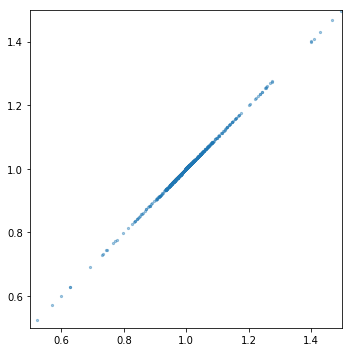

In [49]:
skip=150

fig = plt.figure(figsize=(5,5))

plt.scatter(ratio1_lhe[::skip], ratio1_delphes[::skip], s=5., alpha=0.4)

plt.xlim(0.5,1.5)
plt.ylim(0.5,1.5)

plt.tight_layout()
plt.show()

15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos
15:50  update_title_pos


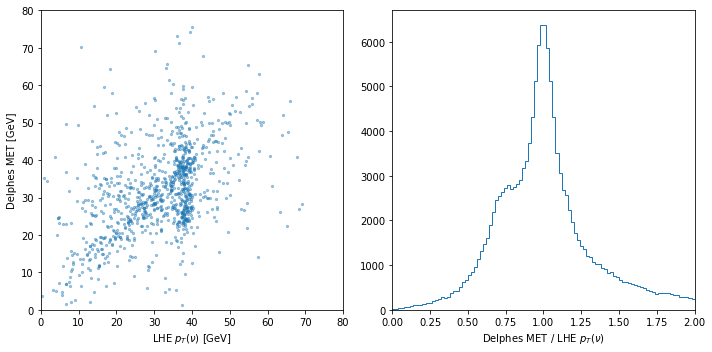

In [50]:
skip=150

fig = plt.figure(figsize=(10,5))



ax = plt.subplot(1,2,1)

plt.scatter(met_lhe[::skip], met_delphes[::skip], s=5., alpha=0.4)

plt.xlim(0.,80.)
plt.ylim(0.,80.)

plt.xlabel(r'LHE $p_T(\nu)$ [GeV]')
plt.ylabel(r'Delphes MET [GeV]')



ax = plt.subplot(1,2,2)

plt.hist(met_delphes / met_lhe, range=(0.,2.), bins=100, histtype='step')

plt.xlim(0.,2.)

plt.xlabel(r'Delphes MET / LHE $p_T(\nu)$')



plt.tight_layout()
plt.show()